<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2009/Task_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業01

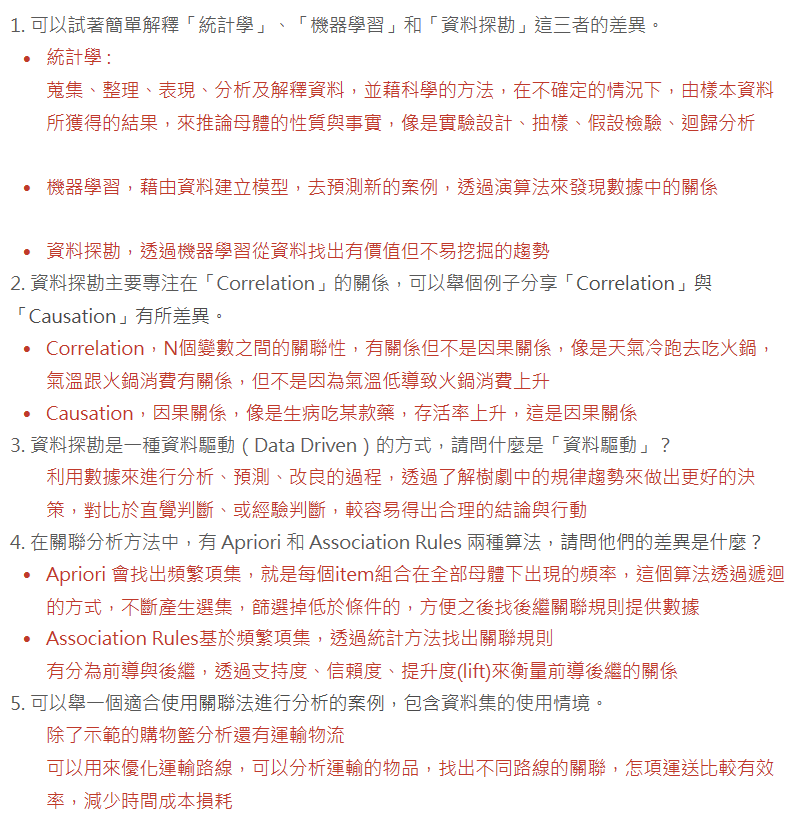

# 作業 02

---

練習：請根據給定的資料集，計算出「Frequent Patterns（Apriori）」和「Association Rules」的結果

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
dataset = [
  ['Milk', 'Onion', 'Nutmeg', 'Kidney' 'Beans', 'Eggs', 'Yogurt'],
  ['Dill', 'Onion', 'Nutmeg', 'Kidney' 'Beans', 'Eggs', 'Yogurt'],
  ['Milk', 'Apple', 'Kidney' 'Beans', 'Eggs'],
  ['Milk', 'Unicorn', 'Corn', 'Kidney' 'Beans', 'Yogurt'],
  ['Corn', 'Onion', 'Onion', 'Kidney' 'Beans', 'Ice cream', 'Eggs'],
]

# df = pd.get_dummies(pd.DataFrame(dataset).stack()).sum(level=0)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,KidneyBeans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
# 進行 Apriori 演算法分析
frequent_itemsets = apriori(df, min_support = 0.5, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.7)
rules.sort_values('confidence', ascending=False, inplace=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(KidneyBeans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(KidneyBeans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, KidneyBeans)"
8,0.6,"(KidneyBeans, Onion)"
9,0.6,"(Yogurt, KidneyBeans)"


In [ ]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
1,(Eggs),(KidneyBeans),0.8,1.00,1.00
3,(Onion),(Eggs),0.6,1.00,1.25
4,(Milk),(KidneyBeans),0.6,1.00,1.00
5,(Onion),(KidneyBeans),0.6,1.00,1.00
6,(Yogurt),(KidneyBeans),0.6,1.00,1.00
8,"(Onion, Eggs)",(KidneyBeans),0.6,1.00,1.00
9,"(KidneyBeans, Onion)",(Eggs),0.6,1.00,1.25
11,(Onion),"(KidneyBeans, Eggs)",0.6,1.00,1.25
0,(KidneyBeans),(Eggs),0.8,0.80,1.00
2,(Eggs),(Onion),0.6,0.75,1.25
